# Análisis sobre el diseño de generador de raíces cuadradas a partir de la construcción del segmento áureo

## Simulación sobre el error cuadrático medio (ECM) acumulado por el generador de números a partir del nivel de precisión máximo soportable por el instrumento de medida usado para la construcción del segmento áureo con la finalidad de observar posibles generadores de numeros irracionales en la epoca de los Pitagoricos.

Johany Carmona
johany.carmona@tuta.io

A continuación se realiza la construcción del Script en Python el cual se ejecutará a través de un cuaderno de Jupyter usando el Kernel de Python con la finalidad de obtener los resultados relacionados a la simulación de un posible generador de raíces cuadradas para la época a partir de los conocimientos que poseían los filósofos pitagóricos con respecto a la construcción del segmento áureo y la irracionalidad contenida en él.

### Simulación de generador de números irracionales para las primeras 100 raíces cuadradas

A continuación, se realizará la simulación para las primeras 100 raíces cuadradas y usando cinco instrumentos de precisión varíada entre 0.1 metros (10 milímetros) hasta 0.00001 metros (1 centésima parte de un milímetro).

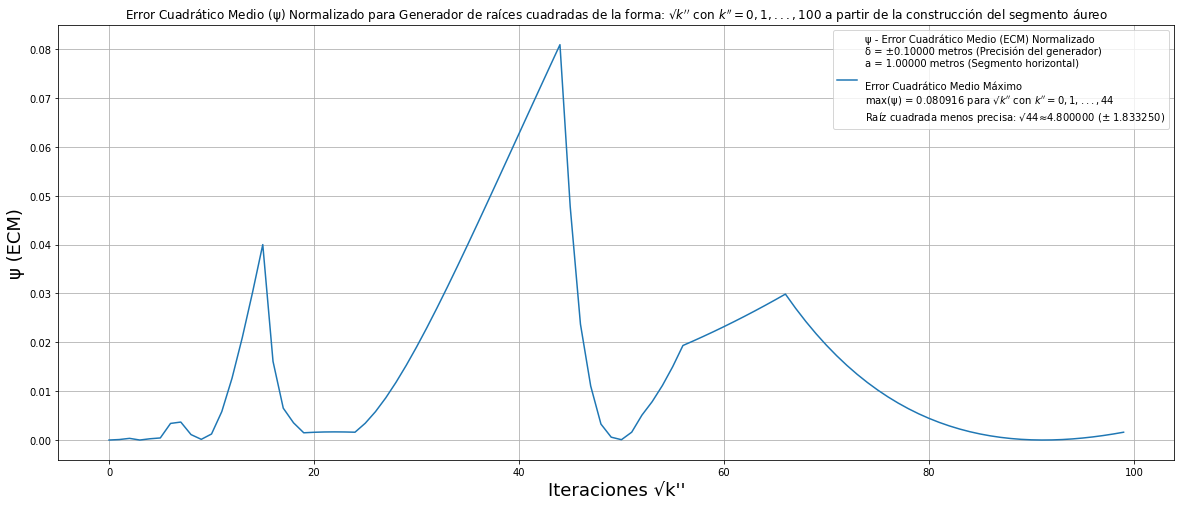

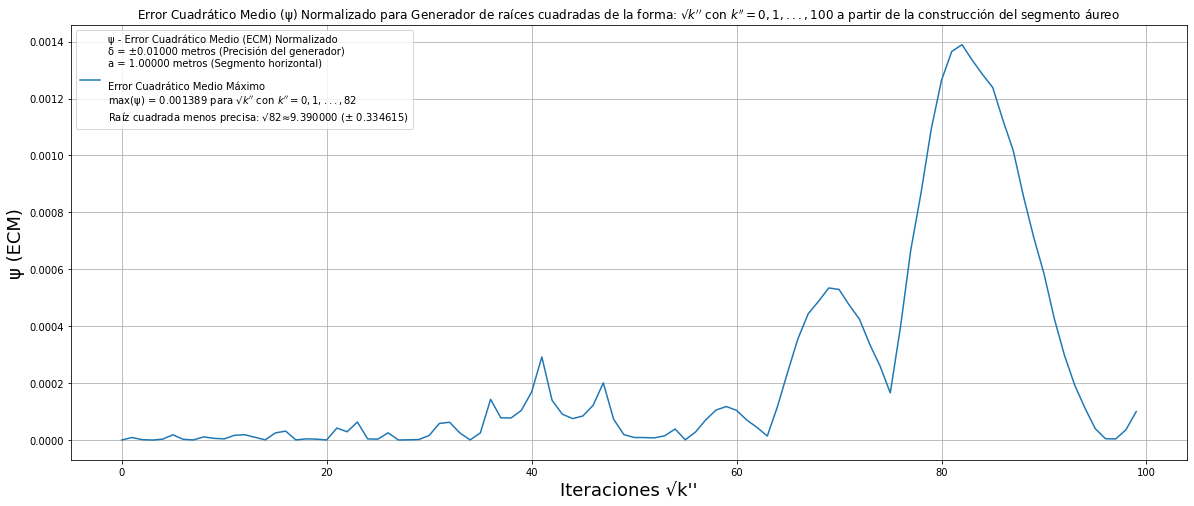

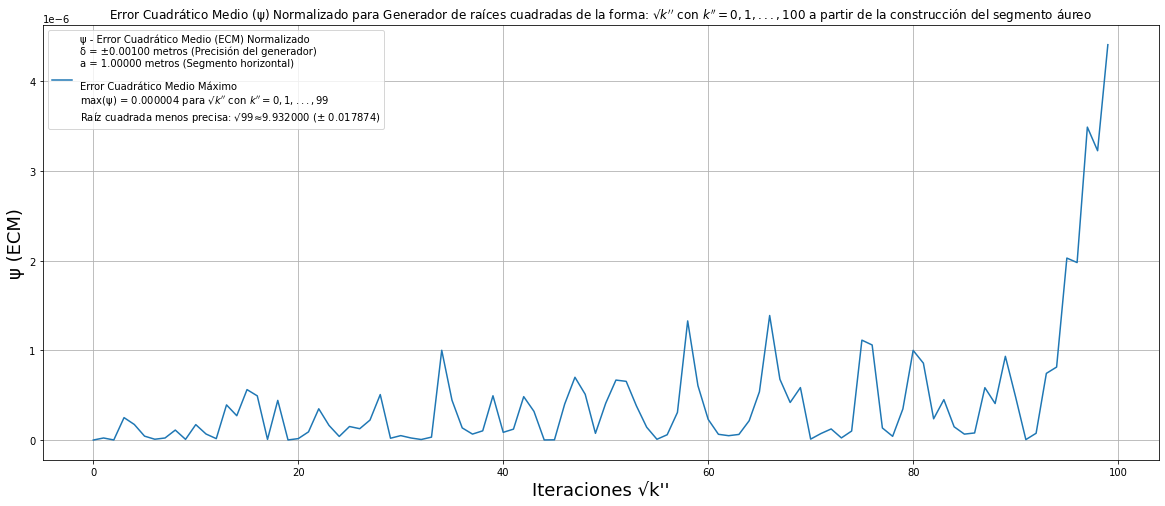

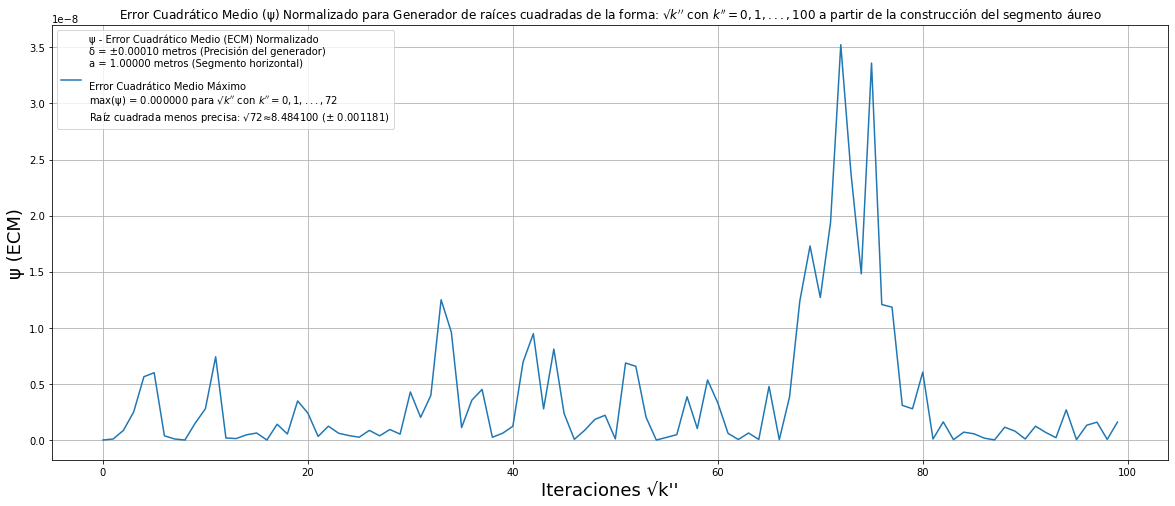

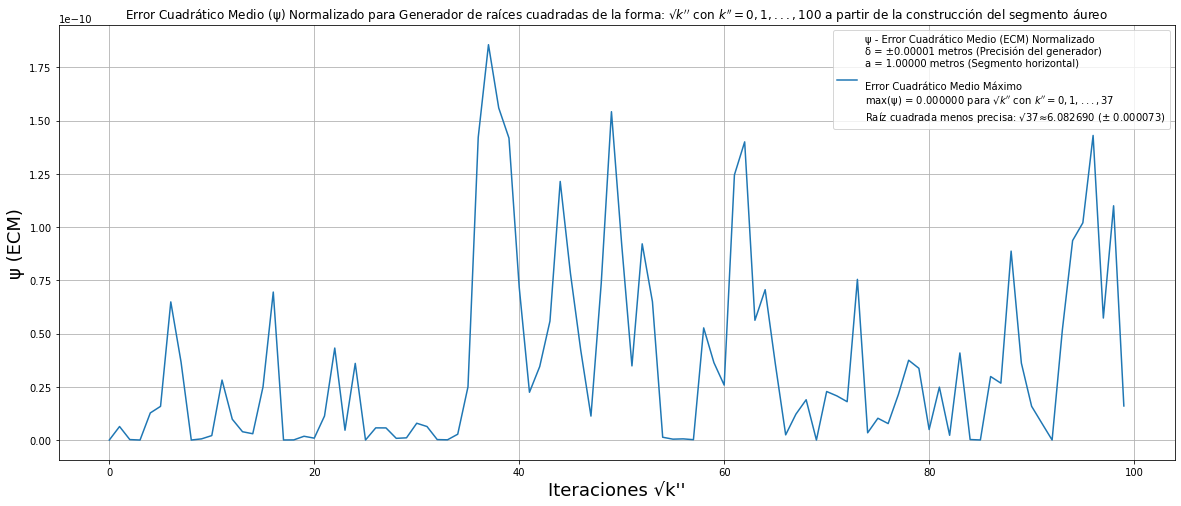

In [ ]:
#Importing required libraries to make matematical operations and graph the results.
import numpy as np
import matplotlib.pyplot as plt

#Round number function in order to simulate accuracy of the measuring tools.
def round_δ(number, delta):
    digits = int(np.log(1/delta)/2)
    return round(number, digits)
    
#Vertical proportion k.a
def k_δ(k__):
    k = 1 / np.sqrt(k__)
    k_δ = round_δ(k, delta)
    return k_δ

#Vertical proportion k.a rounded by a +- δ accuracy.
def b_δ(a, k_δ):
    b = a*k_δ*(np.sqrt(1 + 1 / k_δ**2) - 1) if k_δ != 0 else 0
    b_δ = round_δ(b, delta)
    return b_δ
    

#Square memory generator (Required the previous number generated)
def G(k__, G_):
    G = 0
    if k__ < 0: raise Exception
    if k__ > 0: 
        G = ( b_δ(a, k_δ(k__)) / a ) * G_ + 1
        G = round_δ(G, delta)
    return G

#Memory table of the virtual generator
def generate_table(N):
    G_table = [G(0,0),G(1,0)]
    for i in range(1, N):
        G_table.append(G(i,G_table[-1]))
    return G_table
    

#Media Square Error measuring.
def ψ(n):
    ECM = 0
    G_table = generate_table(n)
    for k in range(n+1):
        ECM = (G_table[k] - np.sqrt(k))**2
    ECM = ECM / n
    return ECM


#Media Square Error measuring (accumulated vector)
def ψ_vector(N):
    ECM_vector = []
    for k in range(N):
        ECM_vector.append(ψ(k+1))
    return ECM_vector

#Plotter function
def plot_vector(vector, maximum = None, maximum_id = None, delta = None, root_square = None):
    if type(maximum) == type(None):
        maximum = max(vector)
    if type(maximum_id) == type(None):
        maximum_id = deltas.index(maximum)
    plt.figure(figsize=(20,8))
    plt.grid()
    error_difference = abs(root_square - np.sqrt(maximum_id))
    plt.plot(vector, label = 'ψ - Error Cuadrático Medio (ECM) Normalizado\nδ = ±%.5f metros (Precisión del generador)\na = %.5f metros (Segmento horizontal)\n\nError Cuadrático Medio Máximo\nmax(ψ) = %f para $√k\'\'$ con $k\'\' = 0, 1, ..., %i$\nRaíz cuadrada menos precisa: $√%i ≈ %f$ (± %f)'%(delta, a, maximum, maximum_id, maximum_id, root_square, error_difference))
    plt.xlabel('Iteraciones √k\'\'',fontsize=18) # x Axis
    plt.ylabel('ψ (ECM)',fontsize=18) # Y Axis
    plt.title("Error Cuadrático Medio (ψ) Normalizado para Generador de raíces cuadradas de la forma: $√k\'\'$ con $k\'\' = 0, 1, ..., %i$ a partir de la construcción del segmento áureo"%(iterations))
    plt.legend()
    plt.show()

#Defining initial conditions.
a = 1.0 #Normalized a segment. - meters
deltas = [0.1, 0.01, 0.001, 0.0001, 0.00001] #Always choose a multiple of 10: e.g. 1, 0.1, 0.01, 0.001, ... - meters
iterations = 100 #Square root size - squares number

#Defining implicated parameters of the system.
ψ_vectors = []
maximums = []
maximum_ids = []
root_squares = []
for delta in deltas:
    ψ_vectors.append(ψ_vector(iterations))
    maximums.append(max(ψ_vectors[-1]))
    maximum_ids.append(ψ_vectors[-1].index(maximums[-1]))
    root_squares.append(generate_table(maximum_ids[-1])[-1])

maximum = max(maximums)

for i in range(len(deltas)):
    plot_vector(ψ_vectors[i], maximums[i], maximum_ids[i], deltas[i], root_squares[i])

De las gráficas generadas, podemos observar a simple vista que el error cuadrático medio acumulado NO es lineal, o en otras palabras, existirán picos máximos para los cuales con el método en mención, NO será posible generar raíces cuadradas con una precisión menor. 

Del mismo modo, se pudo observar que de manera general al aumentar el número de iteraciones, o la raíz cuadrada máxima a generar, se aumentará el error cuadrático medio acumulado, tal como era de esperarse en un inicio.

Por otra parte, la única alternativa para poder solventar el error cuadrático medio acumulado será el de elevar el nivel de precisión de los instrumentos de medida y procedimientos ejecutados.

En un inicio se creía que el aumentar el tamaño del segmento horizontal $a$ del segmento áureo ayudaría a incrementar el nivel de precisión del generador, lo cual resultó en un planteamiento erróneo de la hipótesis, pues se puede concluir que el error cuadrático medio acumulado depende del nivel de precisión máximo admisible por las partes que conforman el generador en la práctica.

### Simulación de generador de números irracionales para las primeras 250 raíces cuadradas

A continuación, se realizará la simulación para las primeras 250 raíces cuadradas y usando cinco instrumentos de precisión varíada entre 0.1 metros (10 milímetros) hasta 0.00001 metros (1 centésima parte de un milímetro).

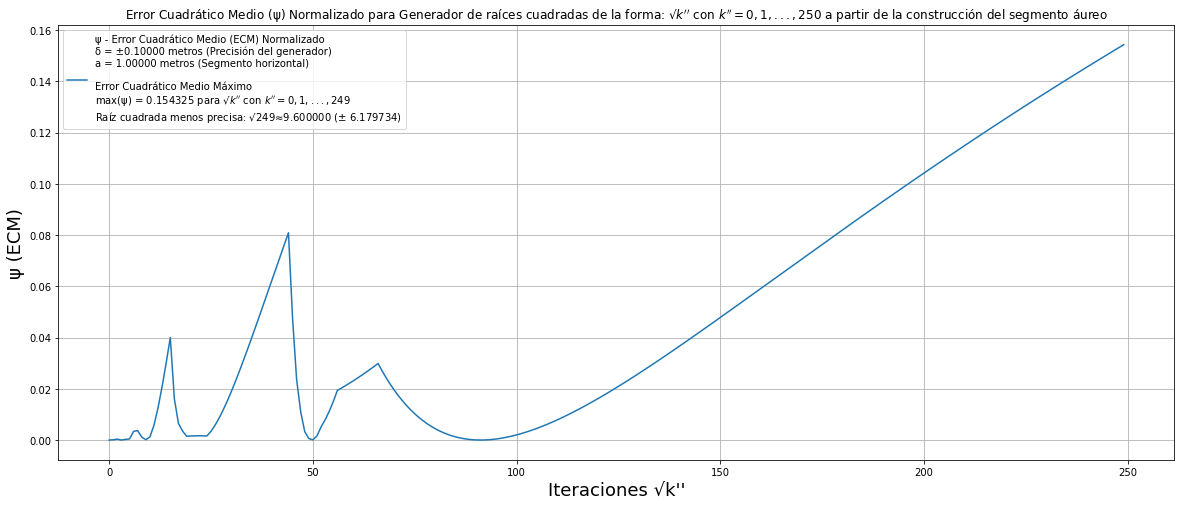

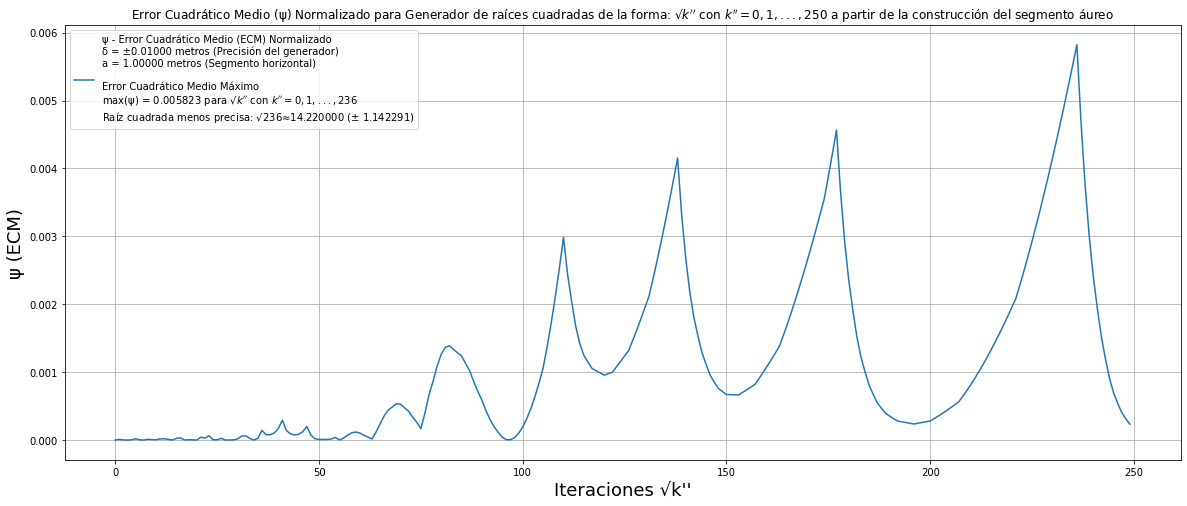

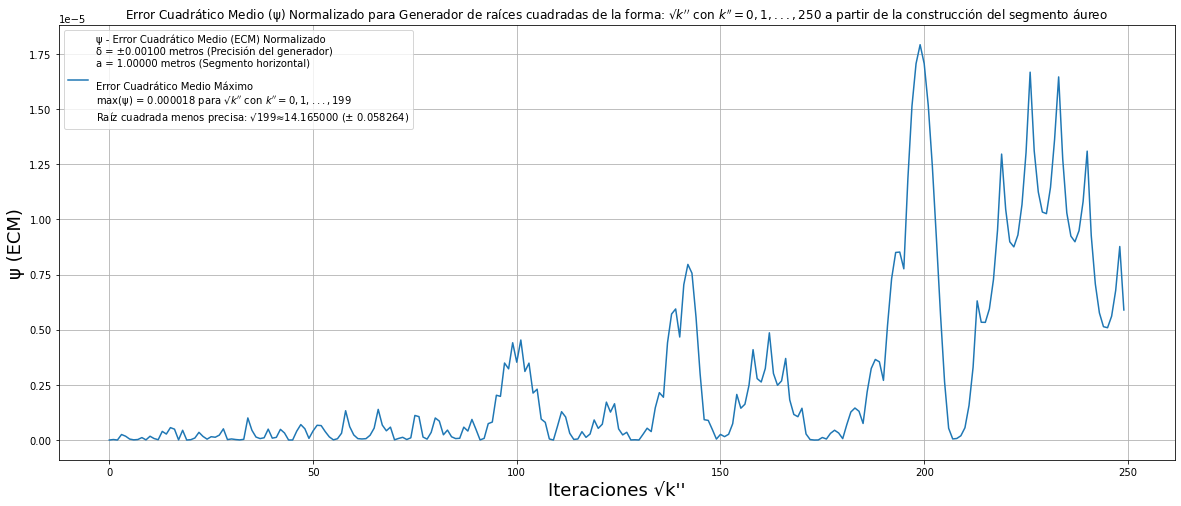

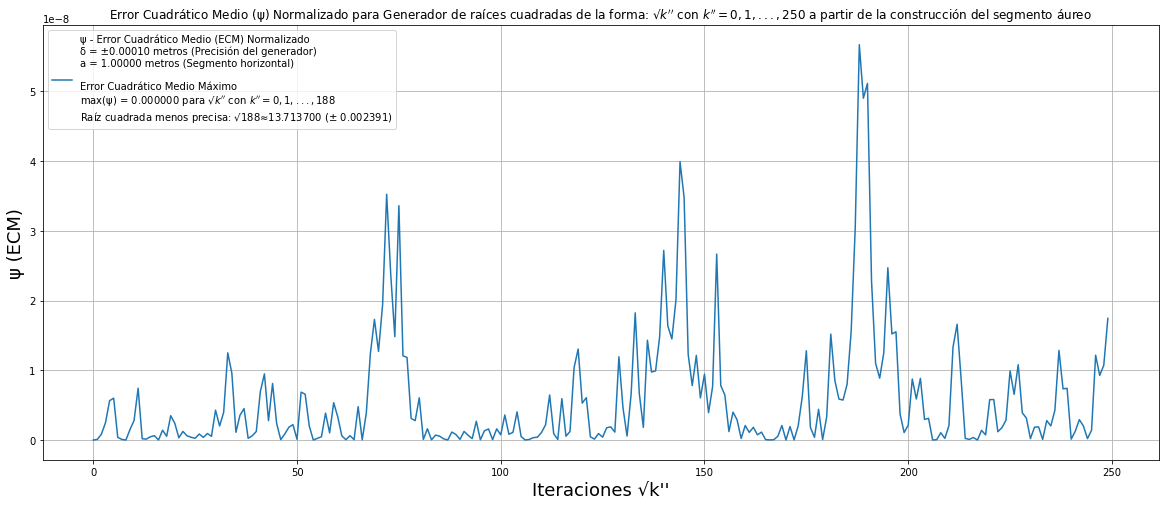

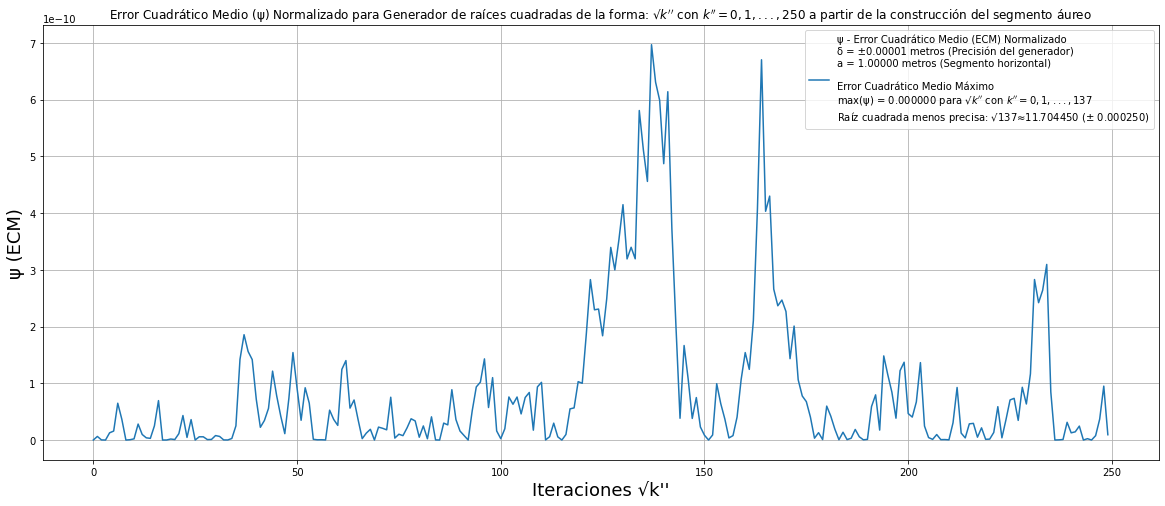

In [ ]:
iterations = 250 #Square root size - squares number

#Defining implicated parameters of the system.
ψ_vectors = []
maximums = []
maximum_ids = []
root_squares = []
for delta in deltas:
    ψ_vectors.append(ψ_vector(iterations))
    maximums.append(max(ψ_vectors[-1]))
    maximum_ids.append(ψ_vectors[-1].index(maximums[-1]))
    root_squares.append(generate_table(maximum_ids[-1])[-1])

maximum = max(maximums)

for i in range(len(deltas)):
    plot_vector(ψ_vectors[i], maximums[i], maximum_ids[i], deltas[i], root_squares[i])

Al intentar saturar el generador aún más allá hasta los 250 primeros números irracionales, podremos observar un nuevo comportamiento demasiado interesante en el cual para el caso del generador con precisión de 10 milímetros (δ = 0.1 metros), podemos ver que raíces cuadradas superiores al número 100 tendrán un error cuadrático medio acumulado que sigue un patrón de linealidad. Lo cual nos puede dar a entender que apartir de este punto el generador deja de ser preciso y se aleja de los valores esperados.

El caso anterior sólo se pudo ver para el generador menos preciso, lo cual nos da una noción de que TODOS los generadores tienen un "límite" de iteraciones o raíz cuadrada a generar, en el cual el error cuadrático medio se vuelve lineal y directamente proporcional al número de iteraciones (efecto indeseado).

Si observamos los resultados de los otros generadores, podemos ver que su precisión es mucho mejor comparada con la del primero, e incluso se puede observar un mayor nivel de detalle entre el nivel de ECM acumulado, como si tuviera una especie de "ruido" el cual presenta umbrales máximos, diferente al caso del generador saturado por su baja precisión (10 milímetros). Del mismo modo podemos observar que el nivel de ECM al no ser lineal en estos casos se vuelve una función periódica la cual al aumentar el nivel de precisión, nos ayuda a atenuar el nivel de error ECM, sin embargo dicha acción resulta también en un efecto de aumentar el "ruido" de dicha propiedad.